# Roller Coaster

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to create several data visualizations that will give you insight into the world of roller coasters.

## Prerequisites

In order to complete this project, you should have completed the first two lessons in the [Data Analysis with Pandas Course](https://www.codecademy.com/learn/data-processing-pandas) and the first two lessons in the [Data Visualization in Python course](https://www.codecademy.com/learn/data-visualization-python). This content is also covered in the [Data Scientist Career Path](https://www.codecademy.com/learn/paths/data-science/).

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [22]:
# 1 
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load rankings data
wood_rank = pd.read_csv('Golden_ticket_Award_Winners_Wood.csv')
print(wood_rank.head())
steel_rank = pd.read_csv('Golden_ticket_Award_Winners_Steel.csv')
print(steel_rank.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, 

2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

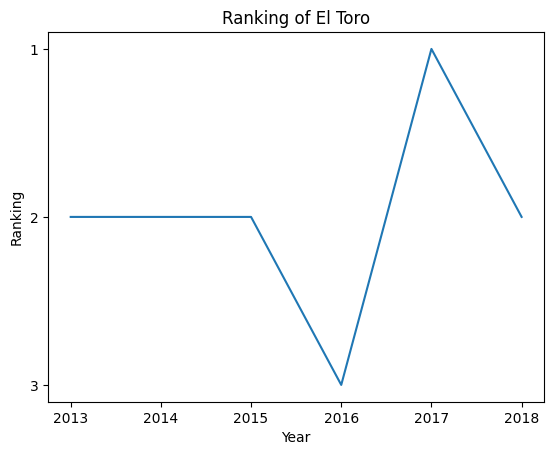

<Figure size 640x480 with 0 Axes>

In [100]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def plot_ranking(name, park_name, ranking):
    # Filter rankings for specific coaster name and park
    rank = ranking[(ranking.Name == name) & (ranking.Park == park_name)]
    #print(rank)
    # Create line plot of ranking over time with markers
    plt.plot(rank['Year of Rank'], rank['Rank'])
    # Label x-axis and set ticks
    plt.xlabel('Year')
    # Label y-axis and set ticks
    plt.ylabel('Ranking')
    return [rank['Rank'].min(), rank['Rank'].max(), rank['Year of Rank'].min(), rank['Year of Rank'].max()]
    
# Create a plot of El Toro ranking over time
plot = plot_ranking('El Toro', 'Six Flags Great Adventure', wood_rank)
plt.title('Ranking of El Toro')
# Invert y-axis since lower rank is better
plt.xticks(range(plot[2],  plot[3]+1, 1))
plt.yticks(range(plot[0], plot[1]+1, 1))
plt.gca().invert_yaxis()
plt.show()
plt.clf()

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

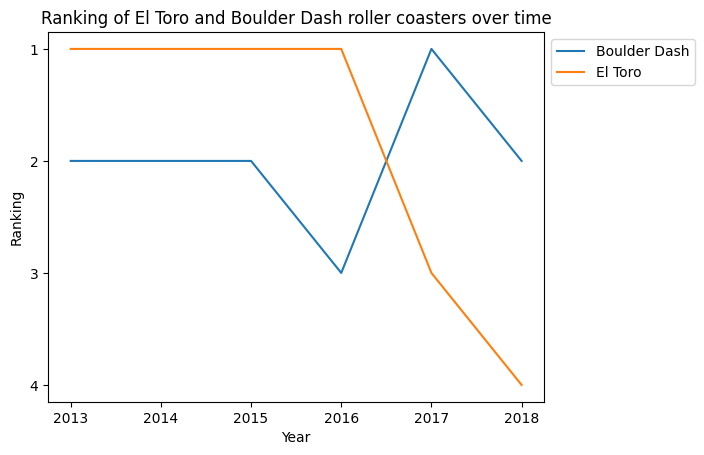

<Figure size 640x480 with 0 Axes>

In [101]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def plot_mul_roller_coasters(coaster_names, park_names, rankings):
  # Loop through each coaster and plot its ranking over time
  value = []
  for i in range(len(coaster_names)):
    if i == 0:
      value = plot_ranking(coaster_names[i], park_names[i], rankings)
    else: 
      temp = plot_ranking(coaster_names[i], park_names[i], rankings)
      if temp[0] < value[0]:
        value[0] = temp[0]
      if temp[1] > value[1]:
        value[1] = temp[1]
      if temp[2] < value[2]:
        value[2] = temp[2]
      if temp[3] > value[3]:
        value[3] = temp[3]
  plt.legend(rankings.Name, loc='upper left', bbox_to_anchor=(1, 1))
  return value

  
# Create a plot of El Toro and Boulder Dash roller coasters
plot = plot_mul_roller_coasters(['El Toro', 'Boulder Dash'], ['Six Flags Great Adventure', 'Lake Compounce'], wood_rank)
plt.title('Ranking of El Toro and Boulder Dash roller coasters over time')
# Invert y-axis since lower rank is better
plt.xticks(range(plot[2],  plot[3]+1, 1))
plt.yticks(range(plot[0], plot[1]+1, 1))
plt.gca().invert_yaxis()
plt.show()
plt.clf()

4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

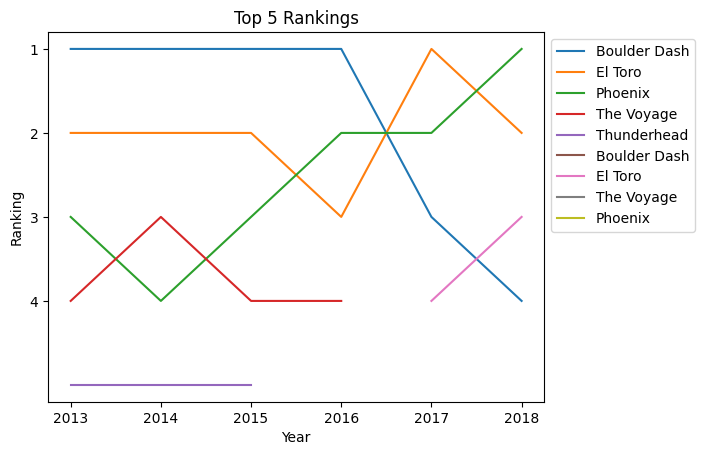

<Figure size 640x480 with 0 Axes>

In [103]:
# 4
# Create a function to plot top n rankings over time
def plot_top_rankings(n, ranking):
    # Get the top n rankings as a DataFrame
    top_n_rankings = ranking[ranking.Rank <= n]
    names = top_n_rankings['Name'] + '***' + top_n_rankings['Park']
    names = names.unique()
    coaster_names = []
    park_names = []
    for name in names:
        if '***' in name:
            coaster_names.append(name.split('***')[0])
            park_names.append(name.split('***')[1])
    # Plot the rankings over time as a line chart
    value = plot_mul_roller_coasters(coaster_names, park_names, top_n_rankings)
    return value

    
# Create a plot of top n rankings over time
plot_top_rankings(5, wood_rank)
plt.title('Top 5 Rankings')
plt.xticks(range(plot[2], plot[3]+1, 1))
plt.yticks(range(plot[0], plot[1]+1, 1))
# Invert y-axis since rank 1 is best
plt.gca().invert_yaxis()
# Display the plot
plt.show()
# Clear the current figure
plt.clf()

5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [119]:
# 5
# load roller coaster data
coaster = pd.read_csv('roller_coasters.csv')
print(coaster.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

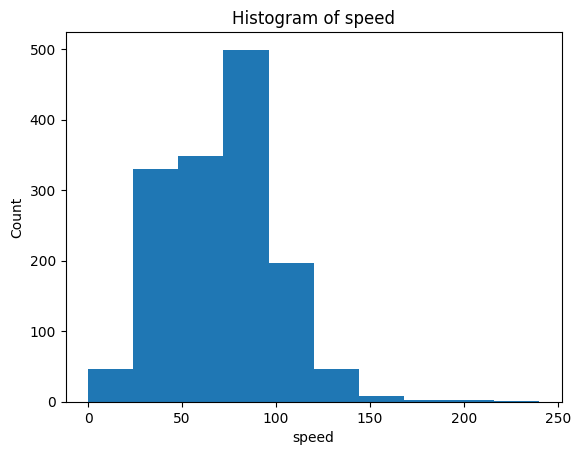

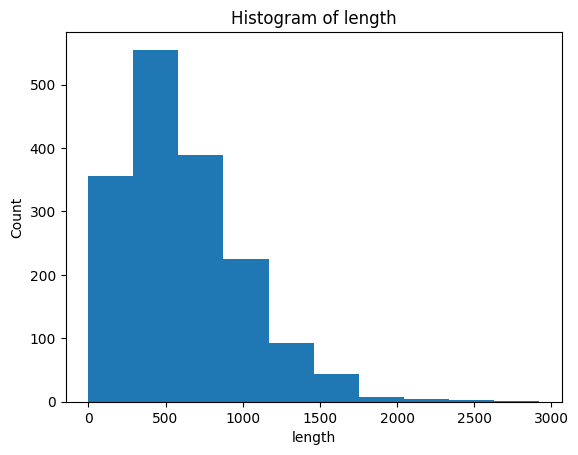

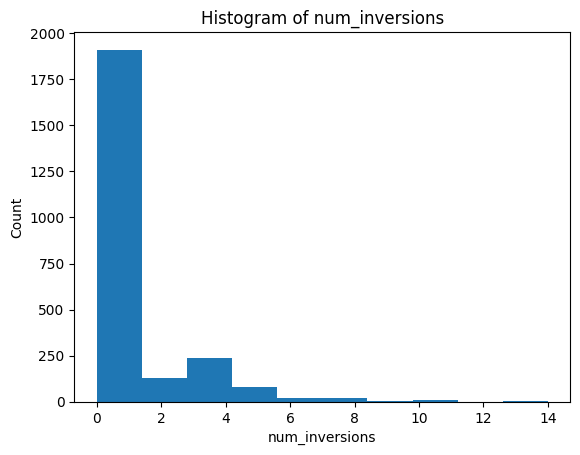

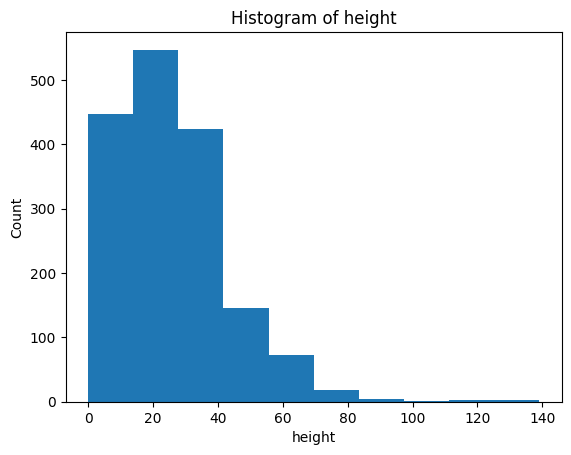

In [112]:
# 6
# Create a function to plot histogram of column values
def plot_histogram(df, column_name):
    plt.hist(df[column_name].dropna())
    plt.title('Histogram of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.show()
    plt.close()
# Create histogram of roller coaster speed
plot_histogram(coaster, 'speed')
# Create histogram of roller coaster length
plot_histogram(coaster, 'length')
# Create histogram of roller coaster number of inversions
plot_histogram(coaster, 'num_inversions')
# Create a function to plot histogram of height values

# Create a histogram of roller coaster height
plot_histogram(coaster[coaster.height <= 140], 'height')

7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

                               name material_type   seating_type  speed  \
152                         Bizarro         Steel      Floorless   98.0   
185   Great American Scream Machine         Steel       Sit Down  109.0   
460   Batman And Robin: The Chiller         Steel       Sit Down  113.0   
461                 Batman The Ride         Steel       Inverted   81.0   
1489                  Green Lantern         Steel       Stand Up  102.0   
467      Superman - Ultimate Flight         Steel         Flying   82.0   
138                       Kingda Ka         Steel       Sit Down  206.0   
154                           Nitro         Steel       Sit Down  128.0   
270                         El Toro        Wooden       Sit Down  113.0   
462        Harley Quinn Crazy Train         Steel       Sit Down   36.0   
463             Road Runner Railway         Steel       Sit Down    NaN   
464                 Rolling Thunder        Wooden       Sit Down   90.0   
465              Runaway 

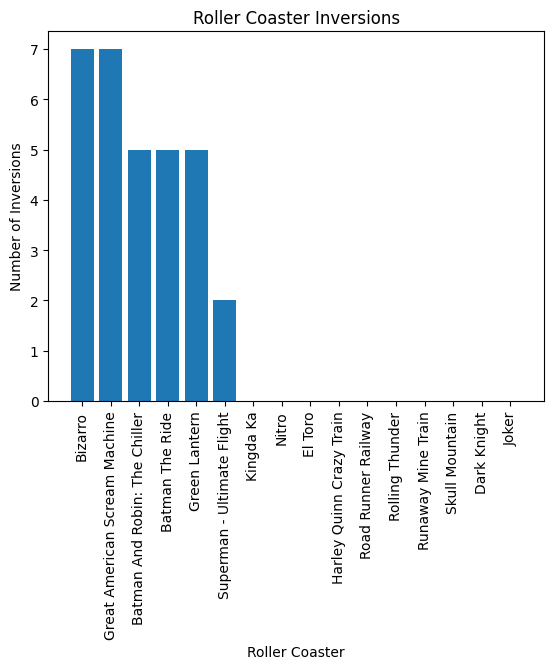

In [124]:
# 7
# Create a function to plot inversions by coaster at park
def plot_bar(df, park_name):
    park_name = df[df.park == park_name].sort_values('num_inversions', ascending=False)
    print(park_name)
    plt.bar(park_name.name, park_name.num_inversions)
    plt.title('Roller Coaster Inversions')
    plt.xlabel('Roller Coaster')
    plt.xticks(rotation=90)
    plt.ylabel('Number of Inversions')
    plt.show()
# Create barplot of inversions by roller coasters

plot_bar(coaster, 'Six Flags Great Adventure')

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

                     status  name  material_type  seating_type  speed  height  \
0  status.closed.definitely   439            439           439    199     244   
1          status.operating  2172           2172          2172   1191    1321   

   length  num_inversions  manufacturer  park  
0     222             417           439   439  
1    1357            1815          2172  2172  


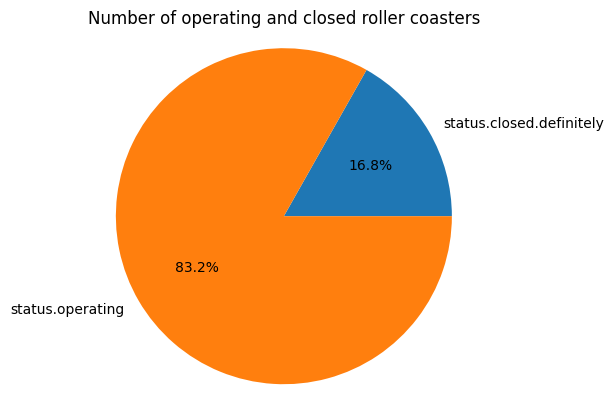

In [136]:
# 8
# Create a function to plot a pie chart of status.operating
def plot_status_pie(df):
    status_count = df[(df.status == 'status.operating') | (df.status == 'status.closed.definitely')].groupby('status').count().reset_index()
    print(status_count)
    plt.pie(status_count.name, labels=status_count.status, autopct='%0.1f%%')
    plt.title('Number of operating and closed roller coasters')
    plt.axis('equal')
    plt.show()
# Create pie chart of roller coasters
plot_status_pie(coaster)

9. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

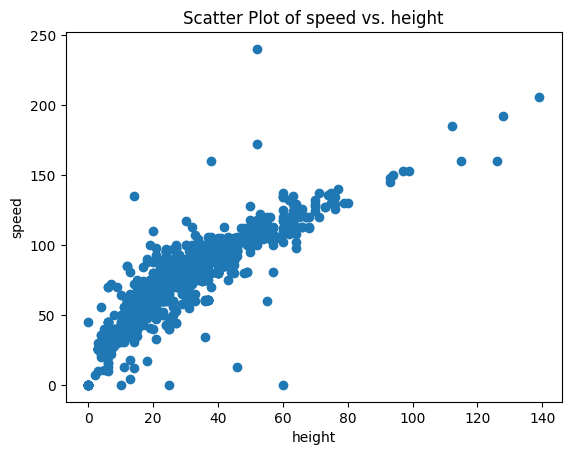

In [143]:
# 9
# Create a function to plot scatter of any two columns
def plot_col(df, column_x, column_y):
    plt.scatter(df[column_x], df[column_y])
    plt.title('Scatter Plot of {} vs. {}'.format(column_y,column_x))
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.show()
# Create a function to plot scatter of speed vs height
plot_col(coaster[coaster.height <= 140], 'height', 'speed')
# Create a scatter plot of roller coaster height by speed


10. Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

    Some questions you might want to answer with the datasets provided include:
    - What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
    - Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
    - Do amusement parks have any specialties?
    
    What visualizations can you create that answer these questions, and any others that come to you? Share the questions you ask and the accompanying visualizations you create on the Codecademy forums.

## Solution

Great work! Visit [our forums](https://discuss.codecademy.com/t/roller-coaster-challenge-project-python-pandas/462378) or the file **Roller Coaster_Solution.ipynb** to compare your project to our sample solution code. You can also learn how to host your own solution on GitHub so you can share it with other learners! Your solution might look different from ours, and that's okay! There are multiple ways to solve these projects, and you'll learn more by seeing others' code.